## Executive Master Statistique et Big Data: Année 2020-2021 - Université Paris-Dauphine

## Régression non-paramétrique
### Cours enseigné par Céline Duval 

### Devoir Maison rédigé par David Thébault


### Cadre

On dispose de données $(Xi, Yi)_{1 \leq i \leq 5000} $,  où les $X_i$ et les $Y_i$ sont des réalisations de variables
aléatoires réelles admettant la représentation

$ Y_i = r(X_i) + \sigma(X_i)*\xi_i  $ avec $ 1 \leq i \leq 5000 $

- Les $\xi_i$ sont indépendantes et identiquement distribuées, avec $E[\xi_1] = 0 $, et $E[\xi_1^2] = 1$, et ont une densité $\mu$.

- La fonction $x \mapsto \sigma(x)$ est strictement positive. Si $\sigma$ est constante on parle d'un modèle
homoscédastique, sinon le modèle est dit hétéroscédastique.

- Les $X_i$ sont indépendantes et identiquement distribuées de densité $g : [1; 6] \mapsto \mathbb{R}_+$, et
indépendantes des $\xi_i$.

- La fonction $r : \mathbb{R} \mapsto\mathbb{R}$, vérifie $|r(x)| \leq 2$ pour tout $x \in [1; 6]$.

On dispose de deux jeux de données, Data1 et Data2, dont la première colonne correspond
aux $X_i$ et la seconde colonne correspond aux $Y_i$.

- Data1: Dans ce jeu de données la variance des erreurs ne dépend pas de $X$ (modèle homoscédastique).

- Data2 : Les différences avec les donnees Data1 sont la loi $\mu$ des erreurs $\xi$ et le fait que
$\sigma$ est non constante (modèle hétéroscédastique).


On a les mêmes valeurs pour les $X_i$ et la même fonction de régression r dans Data1 et Data2.

### Objectifs

Les objectifs des 3 parties qui suivent sont :
1. Reconstruire $x \mapsto g(x)$ graphiquement et étudier si $g$ est la densité uniforme ou non.
2. Reconstruire $x \mapsto r(x)$ graphiquement.
3. Explorer les propriétés de $x \mapsto \mu(x)$ et $x \mapsto \sigma(x)$.

### 1. Etude de la densité g des X

Pour cette partie on utilisera la première colonne des données __Data1__.

1.1. Construire un estimateur à noyau $\hat{g}_{n,h}(x)$ de $g(x)$ pour une fenêtre de lissage $h > 0$ donnée et représenter graphiquement $x \mapsto \hat{g}_{n,h}(x)$ pour différentes valeurs de h que vous choisirez. On discutera la raison pour laquelle ce choix est important.

In [138]:
# import des librairies

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from math import *

import pandas as pd # gestion de données de type DataFrame
import numpy as np # gestion des tableaux et opérations d'algèbre linéaire de base
import matplotlib.pyplot as plt # graphes
import matplotlib as mpl # statistics et visualisation
import os.path # gestion des path
import scipy.stats as st # librairie de calcul scientifique basée sur numpy, import du package statistiques

from scipy.stats import expon

# Deux fonctions (au moins) permettent de faire de l'estimation à noyau sous Python
# La première KDEUnivarite
from statsmodels.nonparametric.kde import KDEUnivariate 
from statsmodels.nonparametric.kernel_regression import KernelReg # NW et Polynome locaux p=0
import statsmodels.nonparametric.bandwidths
# La seconde KernelDensity
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
#from sklearn_extensions.kernel_regression import KernelRegression


In [139]:
# Nous allons commencer par charger les données Data1.csv et Data2.csv

path_work_win = r'/Users/davidtbo/OneDrive/Documents/Data_Science/10_Régression_non_paramétrique'
path_win_Data1 = os.path.join(path_work_win, 'Data1.csv')
path_win_Data2 = os.path.join(path_work_win, 'Data2.csv')

path_win_Data1 = path_win_Data1.replace("\\","/")
path_win_Data1 = path_win_Data1.replace("\\","/")

if os.path.isfile(path_win_Data1):

    Data1 = pd.read_csv(path_win_Data1)

else:

    print("absence du fichier: ",path_win_Data1)

if os.path.isfile(path_win_Data2):

    Data2 = pd.read_csv(path_win_Data2)

else:

    print("absence du fichier: ",path_win_Data2)


In [140]:
Data1.head(5)
Data2.head(5)

Unnamed: 0         X        Y1
0           1  1.034366  1.035967
1           2  3.643734  1.368706
2           3  5.701457  1.030205
3           4  5.420473  1.309923
4           5  1.009888  1.065813

Unnamed: 0         X        Y2
0           1  1.034366  0.458698
1           2  3.643734  1.439542
2           3  5.701457  0.907269
3           4  5.420473  1.807085
4           5  1.009888  1.393327

In [141]:
type(Data1)

pandas.core.frame.DataFrame

In [142]:
Data1.shape

(5000, 3)

Résumé statistique des $X_i$, $Y_i$ des deux jeux de données Data1 et Data2

In [143]:
Data1.describe()
Data2.describe()

Unnamed: 0            X           Y1
count  5000.000000  5000.000000  5000.000000
mean   2500.500000     3.527486     1.235370
std    1443.520003     1.839532     0.585506
min       1.000000     1.000000    -4.952235
25%    1250.750000     1.617688     0.833701
50%    2500.500000     3.576746     1.175970
75%    3750.250000     5.418334     1.536368
max    5000.000000     6.000000    10.325009

Unnamed: 0            X           Y2
count  5000.000000  5000.000000  5000.000000
mean   2500.500000     3.527486     1.226723
std    1443.520003     1.839532     2.075400
min       1.000000     1.000000    -7.603334
25%    1250.750000     1.617688     0.233537
50%    2500.500000     3.576746     1.046899
75%    3750.250000     5.418334     2.250319
max    5000.000000     6.000000    10.562283

Représentons graphiquemenent, par un histogramme, la variable X.

<AxesSubplot:ylabel='Frequency'>

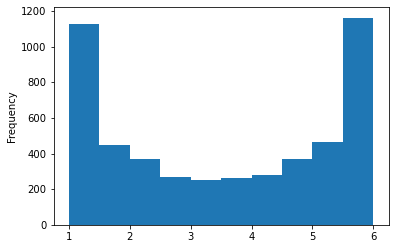

In [144]:
Data1.X.plot(kind = "hist")

La distribution de $X$ est bimodale. La variable $X$ ne suit pas la loi normale.

## 1. Etude de la densité g des X

_Pour cette partie on utilisera la première colonne des données_ __Data1__.

### 1.1. Estimateur à noyau $\hat{g}_{n,h}(x)$ de la densité $g(x)$

Construire un estimateur à noyau $\hat{g}_{n,h}(x)$ de $g(x)$ pour une fenêtre de lissage $h > 0$ donnée et représenter graphiquement $x \mapsto \hat{g}_{n,h}(x)$ pour différentes valeurs de h que vous choisirez. On discutera la raison pour laquelle ce choix est important.

Pour construire un estimateur à noyau $\hat{g}_{n,h}(x)$ de $g(x)$ pour une fenêtre de lissage $h > 0$ donnée, nous reprenons la fonction vue en cours qui utilise la méthode KDEUnivariate.

In [145]:
def g_hat(grid , X, h, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels""" 
    # grid: grille de points où l'estimateur de $g$ sera évalué
    # X: échantillon (X_1,..., X_n)
    # h: choix de la taille de la fenêtre
    # **kwargs: arguments optionels Par défaut le noyau gaussien est utilisé
    kde = KDEUnivariate(X)
    kde.fit(bw = h, **kwargs)
    return kde.evaluate(grid)

Ci-dessous nous représentons graphiquement la fonction $x \mapsto \hat{g}_{n,h}(x)$ pour différentes valeurs du paramètre de lissage h que nous avons déterminées.

Text(0.5, 0, 'X')

Text(0, 0.5, 'fonction densité')

Text(0.5, 1.0, 'Représentation de la densité')

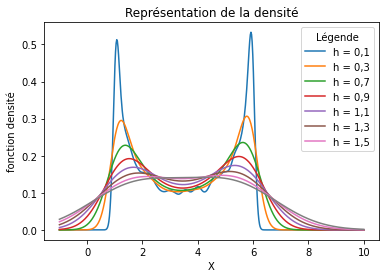

In [146]:
grid = np.linspace(-1,10,500)
g1,  = plt.plot(grid, g_hat(grid, Data1['X'],h=0.1))
g3,  = plt.plot(grid, g_hat(grid, Data1['X'],h=0.3))
g5,  = plt.plot(grid, g_hat(grid, Data1['X'],h=0.5))
g7,  = plt.plot(grid, g_hat(grid, Data1['X'],h=0.7))
g9,  = plt.plot(grid, g_hat(grid, Data1['X'],h=0.9))
g11, = plt.plot(grid, g_hat(grid, Data1['X'],h=1.1))
g13, = plt.plot(grid, g_hat(grid, Data1['X'],h=1.3))
g15, = plt.plot(grid, g_hat(grid, Data1['X'],h=1.5))

plt.legend([g1, g3, g5, g7, g9, g11, g13, g15], ['h = 0,1', 'h = 0,3', 'h = 0,7', 'h = 0,9', 'h = 1,1', 'h = 1,3', 'h = 1,5'],
              loc = 'upper right' , title = 'Légende')
plt.xlabel('X')
plt.ylabel('fonction densité')
plt.title('Représentation de la densité')

- Pour les valeurs de h, $h \in ]0; 1.5]$.
    - La densité est bimodale, 
    - Plus h est grand, plus les deux bosses deviennent plates
    - Pour $h = 0.1$ on observe une plus grande volatilité autour de la moyenne.

Text(0.5, 0, 'X')

Text(0, 0.5, 'fonction densité')

Text(0.5, 1.0, 'Représentation de la densité')

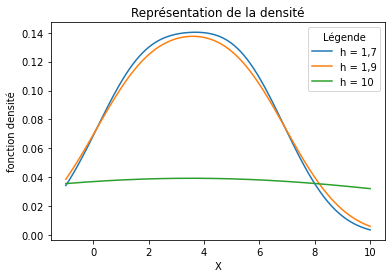

In [147]:
grid = np.linspace(-1,10,500)
g17,  = plt.plot(grid, g_hat(grid, Data1['X'],h=1.7))
g19,  = plt.plot(grid, g_hat(grid, Data1['X'],h=1.9))
g100, = plt.plot(grid, g_hat(grid, Data1['X'],h=10))

plt.legend([g17, g19, g100], ['h = 1,7', 'h = 1,9', 'h = 10'],
              loc = 'upper right' , title = 'Légende')
plt.xlabel('X')
plt.ylabel('fonction densité')
plt.title('Représentation de la densité')

- Pour $h > 1,5$ :
    - la densité est unimodale
    - la variable est centrée,
    - Pour $h = 10$, la densité devient quasiment plate.

Le choix de h est primordial car si cet hyperparamètre est trop grand, le lissage ne permettra pas de reproduire la forme bimodale observée grâce à l'histogramme. Si h est trop petit, on observe une relativement forte volatilité de la densité autour de la moyenne, la variance est plus grande. Ce que l'on gagne en précision avec h petit (biais plus petit sous condition de régularité de g), impacte négativement la variance qui augmente. Le choix de h est un compromis biais-variance - biais contrôlé et une variance petite - comme souvent en statistiques.

D'une part les caractéristiques des données semblent être mieux représentées quand $h \leq 1.5$ et d'autre part avec les effets observés précédemment sur la variance d'un h trop petit, on aurait tendance à privilégier $h \geq 0.1$.

### 1.2. Représentation graphique de l'estimateur $\hat{g}_{n,h}(x)$ de la densité $g(x)$

- Nous avons besoin de déterminer l'estimateur de la fenêtre h noté $ \hat{h}_n $ 

- La règle du pouce de Silverman et celle de Scott nous fournissent une première approximation de h pour les fonctions de densité deux fois dérivable. L'hyperparamètre h1 de Scott se retrouve par la formule suivante: $h_{est} = 1.06*\sigma(X)*n^{\frac{-1}{2\alpha + 1}}$ avec ici $\alpha = 2$ pour g deux fois dérivable.


In [148]:
n= 5000
h1 = statsmodels.nonparametric.bandwidths.bw_scott(Data1['X'])
h2 = statsmodels.nonparametric.bandwidths.bw_silverman(Data1['X'])
(1.06*np.sqrt(np.var(Data1['X']))*n**(-1/5), h1, h2)

(0.35495697624782646, 0.3546575787072305, 0.3014087071166265)

Les estimateurs h1 et h2 (Scott et Silverman) de l'hyperparamètre h sont calculés en faisant l'hypothèse que la densité g des $X_i$ est deux fois dérivable, mais la fonction de densité peut être dérivable plus de deux fois. 
A contratrio, si par exemple la densité n'était qu'une fois dérivable, l'estimateur de Scott serait égal à:

In [149]:
n=5000
1.06*np.sqrt(np.var(Data1['X']))*n**(-1/3)

0.11401965315212556

Estimation de h par validation croisée (leave one out)

In [150]:
bandwidths = np.linspace(0, 1, 30) # nous fixons une grille de 30 points compris entre 0 et 1 sur laquelle évaluerons
bandwidths

array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])

Nous devons procéder à un reformatage des données X pour utiliser les fonctions d optimisation ci-après.

In [151]:
X = Data1['X']
Xnew = X.to_numpy().reshape(-1,1)
np.shape(Xnew)

(5000, 1)

Nous utilisons la fonction GrideSearchCV pour déterminer l'estimateur optimal de l'hyperparamètre h.

In [152]:
GG = GridSearchCV(KernelDensity(kernel='gaussian'),{'bandwidth': bandwidths},cv = 2)
GG.fit(Xnew)
h_cv = GG.best_params_["bandwidth"] 
h_cv

GridSearchCV(cv=2, estimator=KernelDensity(),
             param_grid={'bandwidth': array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])})

0.034482758620689655

L'estimateur h_cv de l'hyperparamètre h calculé par la validation croisée est très petit. Comme nous l'avons vu plus haut, l'estimateur à noyeau de la densité g de X pour un h trop petit $(h < 0.3)$ entraîne une variance plus élevée autour de la moyenne. Pour éviter cela nous préférons comme estimateur de h, l'estimateur $\hat{h}_n$ de Silverman $h_2 = 0.30$.

Nous reprenons à nouveau la fonction vue en cours pour déterminer graphiquement $\hat{g}_{n,\hat{h}_n}$ selon les trois hyperparamètres Scott, Silverman et celui obtenu par validation croisée.

Text(0.5, 0, 'X')

Text(0, 0.5, 'fonction densité')

Text(0.5, 1.0, 'Représentation de l estimateur de la densité')

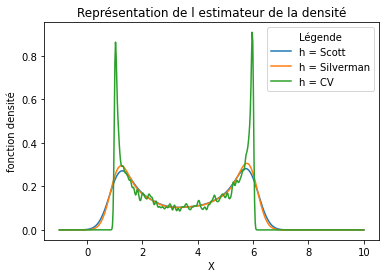

In [153]:
# Utilisation en densité
def g_hat(grid , X, h, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels""" 
    # grid: grille de points où l'estimateur de $f$ sera évalué
    # X: échantillon (X_1,..., X_n)
    # h: choix de la taille de la fenêtre
    # **kwargs: arguments optionels Par défaut le noyau gaussien est utilisé
    kde = KDEUnivariate(X)
    kde.fit(bw = h, **kwargs)
    return kde.evaluate(grid)


g1, = plt.plot(grid, g_hat(grid, X, h1))
g2, = plt.plot(grid, g_hat(grid, X, h2))
g3, = plt.plot(grid, g_hat(grid, X, h_cv))

plt.legend([g1, g2, g3], ['h = Scott', 'h = Silverman', 'h = CV'],loc = 'upper right' , title = 'Légende')
plt.xlabel('X')
plt.ylabel('fonction densité')
plt.title('Représentation de l estimateur de la densité')

La variance est beaucoup plus élevée quand on utilise l'estimateur de l'hyperparamètre h obtenu par validation croisée dont la valeur est relativement faible.

Fonction de répartition de la loi uniforme $U[a;b]$

### 1.3. Implémenter un QQ-plot pour vérifier l'hypothèse _g_ est la distribution uniforme

((array([1.00083172, 1.00201885, 1.00321877, ..., 6.99678123, 6.99798115,
         6.99916828]),
  array([1.        , 1.00000241, 1.00000245, ..., 5.99999668, 5.99999799,
         5.99999985])),
 (1.048060171500124, -0.6647543013787347, 0.9868503047727718))

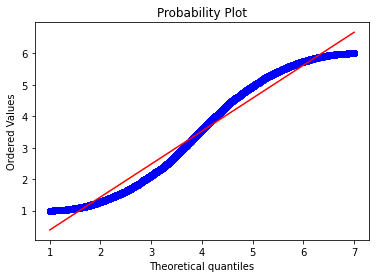

In [154]:
unif = st.uniform(1,6)
st.probplot(X,dist=unif, plot=plt)

L'hypothèse que g soit la distribution uniforme me paraît peu probable car la forme de la courbe bleue des quantiles associés aux observations n'est pas alignée avec les quantiles de la loi uniforme. La courbe bleue est trop sinusoïdale et s'éloigne régulièrement de la première bissectrice.

### 1.4. Zone de l'espace où l'estimation de r sera plus précise

L'estimation de r sera la plus précise là où les observations des $X_i$ seront les plus nombreux i.e. au voisinage de $1^+$ et $6^-$ et nous avons vu qu'à ces voisinages l'estimation de g était fortement dépendante du choix de h.

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 0, 'bins')

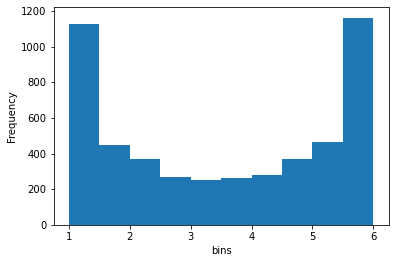

In [155]:
Data1.X.plot(kind = "hist")
plt.xlabel('bins')

### 1.5. Estimateur $ \hat{c}_n^{(k)}$ de $c(k)$.

Pour $ k \geq 1 $, on pose $ c(k) = \int_1^6{x^kg(x)dx} $. 

 
Construire un estimateur $ \hat{c}_n^{(k)}$ de $c(k)$. On pourra en particulier discuter de la qualité de l'estimation en prenant $k=0$.

Si la densité $g(x)$ de $X$ est la distribution uniforme $\textit{U}[1,6]$ alors $c(k) = \mathbb{E}[X^k\mathbb{1}_{[1,6]}(X)]$.
Par la méthode de Monte-Carlo on obtient l'estimateur de $c(k)$ suivant:

In [156]:
n=5000
zgrid = np.linspace(1,6,5000)
u=st.uniform.rvs(1,6, size=n)
np.min(u), np.max(u)
X=Data1['X']
for k in range(2):
        print("k = ",k)
        #np.mean(u**k*(u>=1)*(u<=6)) # estimateur Monte-Carlo avec hypothèse de loi uniforme
        np.mean(u**k) # estimateur Monte-Carlo avec hypothèse de loi uniforme
        np.mean(zgrid**k*g_hat(zgrid, X, h2)) # estimateur non-paramétrique (h = h2)

(1.0015348567332862, 6.999558466958535)

k =  0


1.0

0.17090078695149413

k =  1


3.9991178705221677

0.601977270023502

Pour k = 0, l'estimateur de Monte-Carlo est bien égal à 1 comme intégrale d'une densité sur R alors que l'estimateur non paramétrique est très inférieur à 1. X ne semble donc pas suivre une loi uniforme sur [1,6].

Les deux estimateurs retournent des valeurs éloignées. La densité de X ne semble donc pas être la loi uniformeloi uniforme ne semble.

## 2. Reconstruction de $r(x)$

_Pour cette partie on utilise les données Data1_

La représentation des données peut donc s'écrire sous la forme du modèle additif suivant:

$ Y_i = r(X_i) + \sigma\xi_i $ avec $\sigma $ constante (modèle homoscédastique) et $r$ la fonction de régression.

### 2.1. Est-il plausible de penser que $r$ soit linéaire ?

Pour répondre à cette question, nous allons commencer par représenter graphiquement les couples $(X_i,Y_i) $ avec $ 1 \leq i \leq 5000 .$

(0.0, 3.0)

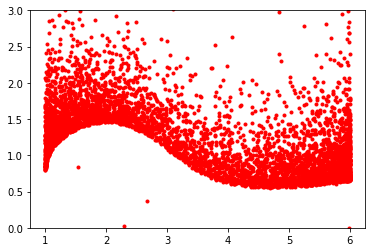

In [157]:
plt.plot(Data1['X'],Data1['Y1'], 'r.')
plt.ylim(0,3)

Le graphe Y contre X indique qu'il est peu probable que r soit linéaire car il serait difficile de trouver une droite s'ajustant au nuage de points.

Nous allons confirmer cette cette première conclusion par la régression linéaire des Moindres Carrés Ordinaires (paramétrique). Cela nous permet d'utiliser la régression linéaire avec Python. Si r est linéaire, r(x) s'écrit comme $ r(x) = ax + b $ avec $a, b \in \mathbb{R}$

$\mathbb{E}(Y_i) = a\mathbb{E}(X_i)$ + b

In [158]:
from sklearn.linear_model import LinearRegression

In [159]:
lm = LinearRegression()

Avant d'appliquer la régression linéaire il faut "reshaper" Y1.

In [160]:
Y = Data1['Y1']
Ynew = Y.to_numpy().reshape(-1,1)

In [161]:
lm.fit(Xnew,Ynew)

LinearRegression()

In [162]:
lm.coef_

array([[-0.14226115]])

La pente du modèle de régression linéaire est proche de 0. L'hypothèse "r est linéaire" est peu plausible.

### 2.2. Construction de l'estimateur non-paramétrique $\widehat{r}_{n,h}(x)$ de $r(x)$ 

Construire une estimateur non-paramétrique $\widehat{r}_{n,h}(x)$ de $r(x)$ pour une fenêtre de lissage $h > 0 $ bien choisie et le représenter graphiquement. 

Le choix de h s'effectuera par validation croisée avec l'estimateur de régression de Nadaraya-Watson.

Le principe de la validation croisée consiste à partir de l'échantillon $(X_k,Y_k)_{k\in(1..n),k\neq i}$ privé d'un individu noté i, d'estimer $\widehat{R}_{(-i),n,h}(x)$ avec h fixé pris dans la grille. A partir de cette estimation, l'erreur moyenne $ err_h = \frac{1}{n}\sum\limits_{i=1}^{i=n}({Y_i - \widehat{R}_{(-i),n,h}(X_i))}^2$ est calculée. On choisit h* comme le h de la grille minimisant cette erreur moyenne: $ h^* = \underset{h \in grid}{argmin}(err_h) $

Nous allons estimer h par la méthode de régression à noyau Nadaraya-Watson (noté h_cv_nw) et par celle des polynômes locaux (noté h_cv_pl).

In [163]:
grid = np.linspace(1,6,100)
X = Data1['X']
Y1 = Data1['Y1']
Kreg_pl = KernelReg(Y1, X, var_type = 'c', reg_type = 'll', bw = 'cv_ls')
h_cv_pl = Kreg_pl.bw
Kreg_nw = KernelReg(Y1, X, var_type = 'c', reg_type = 'lc', bw = 'cv_ls')
h_cv_nw = Kreg_nw.bw
h_cv_pl, h_cv_nw

(array([0.15252058]), array([0.08464892]))

Maintenant que h a été estimé nous pouvons déterminer un estimateur de la fonction de régression $\widehat{r}_{(\alpha,\beta)(x)}$. Nous effectuons deux régressions. Une régression avec l'estimateur de lissage obtenu par Nadaraya-Watson et l'autre régression avec l'estimateur obtenu par polynômes locaux.

In [164]:
Kreg1 = KernelReg(Y1, X, var_type = 'c', reg_type = 'll', bw = h_cv_pl)
r_hat1, dr_hat1 = Kreg1.fit(grid)
Kreg2 = KernelReg(Y1, X, var_type = 'c', reg_type = 'lc', bw = h_cv_nw)
r_hat2, dr_hat2 = Kreg2.fit(grid)

(0.0, 4.0)

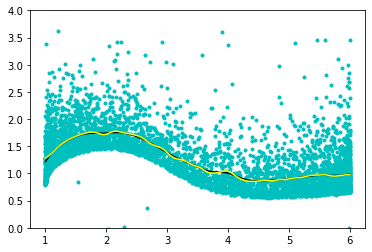

In [165]:
g, = plt.plot(X, Y1, 'c.')
g1,= plt.plot(grid, r_hat1, color = 'black')
g2,= plt.plot(grid, r_hat2, color = 'yellow')
plt.ylim(0,4)

A la lecture de ce graphique, que ce soit avec les polynômes locaux ou avec Nadaraya-Watson, les estimateurs de la fonction de régression sont similaires.

### 2.3. (Facultatif.) Existe-t-il un couple $(\alpha,\beta) \in \mathbb{R}^2$ tel que le modèle $Y_1 = \beta + (X - 2)^\alpha + \varepsilon$ ?

On considère uniquement les valeurs de $X$ comprise dans [1,3]. Soit la fonction $r_{\alpha,\beta}(x) = \beta + (x - 2)^\alpha$, pensez-vous qu'il existe un couple $(\alpha,\beta) \in \mathbb{R}^2$ tel que le modèle $Y_1 = r_{\alpha,\beta}(X) + \varepsilon $ soit adapté aux données, pour une erreur $\varepsilon \sim \mathcal{N}(0,1)$ ? Comment estimer les valeurs de $(\alpha,\beta)$ ?

Text(0.5, 0, '1 <= Xi <= 3')

Text(0, 0.5, 'Yi')

(0.5, 2.5)

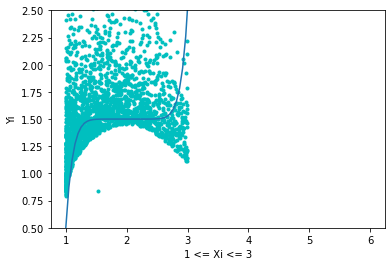

In [166]:
Data1_inf = Data1[ (Data1['X'] >= 1) & (Data1['X'] <= 3)] # on sélectionne dans Data1 les lignes où X \in [1,3]
g, = plt.plot(Data1_inf['X'],Data1_inf['Y1'], 'c.')
plt.plot(grid, (grid-2)**9 + 1.5) # Nous avons essayé de déterminer manuellement une fonction de type r s'ajustant aux données.
plt.xlabel('1 <= Xi <= 3')
plt.ylabel('Yi')
plt.ylim(0.5,2.5)

Si $\alpha < 0$ la fonction n'est pas définie au point $x=2$. Nous nous plaçons donc dans le cas $\alpha > 0 $.

Il est peu probable qu'il existe un couple $(\alpha,\beta)$ tel que le modèle $Y_1 = r_{\alpha,\beta}(X) + \epsilon $ soit adapté aux données. Nos tentatives graphiques donnent pour le mieux un ajustement correct sur [1,3[ mais au voisinage de 3- la fonction tend vers +$\infty$.

Pour estimer le couple $(\alpha,\beta)$, peut-être que nous pourrions dans un premier temps éliminier le paramètre $\beta$ en estimant la densité de la dérivée de la fonction de régression et notamment la valeur de la dérivée  $r_{\alpha,\beta}^{'}(3)$ au point d'abscisse 3 et ainsi déterminer un estimateur de $\alpha$. 

Graphiquement au point d'abscisse $x=2, y = \beta = 1$.

## 3. Etude de la densité $\mu$ des $\varepsilon_i$

### 3.1. On cherche à estimer $x \mapsto \mu(x)$ (modèle homoscédastique)

#### 3.1.1. Quelle est la distribution approximative de $\tilde{\xi}_i$ ?

Par définition $\tilde{\xi}_i = Y_i - \hat{r}_{n,h}^{(-)}(X_i), i \in J_+ = [2501,...,5000]$.

Rappelons que la représentation des variables $(X_i,Y_i)$ est donnée par : $Y_i = r(X_i) + \sigma(X_i)\xi_i$

$\tilde{\xi}_i = Y_i - \hat{r}_{n,h}^{(-)}(X_i) $

$\tilde{\xi}_i = r(X_i) + \sigma(X_i)\xi_i - \hat{r}_{n,h}^{(-)}(X_i) $


$\tilde{\xi}_i = r(X_i) + \sigma\xi_i - \hat{r}_{n,h}^{(-)}(X_i) $ (homoscédasticité dans Data1)

$\tilde{\xi}_i = r(X_i) - \hat{r}_{n,h}^{(-)}(X_i) + \sigma\xi_i$ 

$\tilde{\xi}_i  \approx \sigma\xi_i $

La distribution approximative des $\tilde{\xi}_i $ est la distribution des $ \xi_i $ à un facteur près $\sigma $

#### 3.1.2. En déduire un estimateur de $x \mapsto \mu(x)$ et l'implémenter graphiquement

Nous reprenons h = 0.1525 estimé à la question 2.2 et $\hat{r}_{n,h}^{(-)}$ l'estimateur de r construit à l'aide de $(X_i, Y_i), i \in [1,...,2500]$.

On va commencer par couper le jeu de données Data1 en deux échantillons de même taille.

In [167]:
Data1_first = Data1.iloc[0:2500] # sélection des 2500 premières observations

Data1_last = Data1.iloc[2500:5000] # sélection des 2500 dernières observations

Puis construire l'estimateur de la fonction de régression sur les données $i \in J- =$ {1...2500}

In [168]:
h_cv = 0.1525 # repris de la question 2.2 polynômes locaux

grid_first = np.linspace(1,6,2500)

# On construit l'estimateur de régression à partir des données i \in J-

Kreg3 = KernelReg(Data1_first['Y1'], Data1_first['X'], var_type = 'c', reg_type = 'll', bw = h_cv*np.ones(1))

Nous en déduisons $\tilde{\xi}_i = Y_i - \hat{r}_{n,h}^{(-)}(X_i)$ cette fois-ci calculé pour $i \in $ {2501,...5000}

In [169]:
r_hat3, dr_hat3 = Kreg3.fit(Data1_last['X']) # l'estimateur de régression est appliqué aux données X  i appartenant à J+

Eps = Data1_last['Y1'] - r_hat3 # on définit epsilon comme la différence entre Yi et r(Xi) i appartenantà J+

Représentation graphique de l'estimateur $\tilde{\xi}_i$

(-0.5, 2.0)

0.004008822970013314

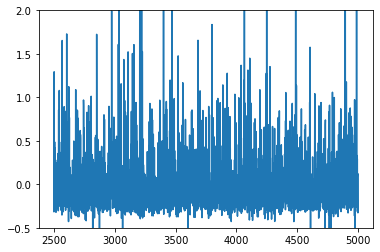

In [170]:
plt.plot(Eps) # graphique des epsilon
plt.ylim(-0.5,2) # zoom sur l'intervalle des ordonnées [-2; 2]
(1/5000)*sum(Eps)

Implémentation graphique de l'estimateur de $ x \mapsto \mu(x)$

Text(0.5, 1.0, 'Représentation de la densité des Eps')

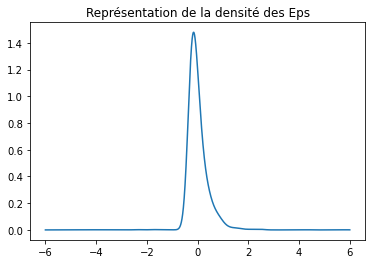

In [171]:
grid = np.linspace(-6,6,5000)
kde = KDEUnivariate(Eps) # Estimateur de mu(x)
kde.fit(bw = h_cv)
val = kde.evaluate(grid)
g, = plt.plot(grid, val)
plt.title('Représentation de la densité des Eps')

La distribution approximative des $\tilde{\xi}_i$ pourrait correspondre à une loi normale.

Mais les tests statistiques et le boxplot ci-dessous ne permettent pas d'affirmer que les $\tilde{\xi}_i$ suivent une loi normale!

In [172]:
st.shapiro(Eps)
st.kstest(Eps, 'norm', args=(0,1))

ShapiroResult(statistic=0.662390410900116, pvalue=0.0)

KstestResult(statistic=0.3409143097859602, pvalue=7.765142577883651e-260)

In [173]:
#gauss = st.norm(0,1)
#st.probplot(Eps,dist=gauss, plot=plt)

Pour construire l'estimateur de $x \mapsto \mu(x)$  et le représenter graphiquement nous réutilisons la fonction g_hat.

0.008017645940026628

Text(0.5, 0, 'grid')

Text(0, 0.5, 'mu_hat')

(-6.0, 6.0)

Text(0.5, 1.0, 'Représentation graphique de l estimateur de mu')

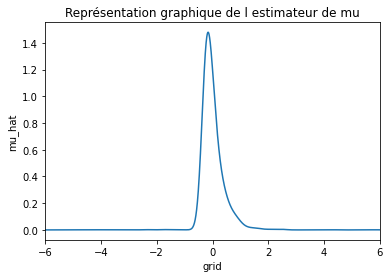

In [174]:
mu_hat = g_hat(grid, Eps, 0.1525)
(1/2500)*sum(Eps)
plt.plot(grid,mu_hat)
plt.xlabel('grid')
plt.ylabel('mu_hat')
plt.xlim(-6,6)
plt.title('Représentation graphique de l estimateur de mu')

#### 3.1.3. (Facultatif) Pourquoi avoir découpé le jeu de données selon J+ et J- ?

L'intérêt d'avoir découpé le jeu de données en deux est d'avoir pu déterminer l'estimateur de la fonction de régression sur un jeu de données qui n'est pas celui utilisé pour le calcul des $\tilde{\xi}_i\$ qui utilise la fonction de régression. Cela permet donc d'éviter le surapprentissage (overfitting).

#### 3.1.4. La densité $x \mapsto \mu(x)$ peut-elle être gaussienne ?

Nous avons ci-dessous tenté d'ajuster une loi normale $\mathcal{N}(-0.1,\,0.27)$ à l'estimateur de la densité des  $\tilde{\xi}_i$. L'hypothèse de normalité est plausible. 

(-6.0, 6.0)

(0.0, 1.5)

Text(0.5, 0, 'grid')

Text(0, 0.5, 'mu_hat')

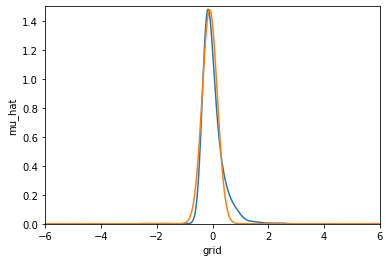

In [175]:
mu_hat = g_hat(grid, Eps, 0.1525)
plt.plot(grid, mu_hat)
plt.plot(grid, st.norm.pdf(grid,-0.1,0.27))
plt.xlim(-6,6)
plt.ylim(0,1.5)
plt.xlabel('grid')
plt.ylabel('mu_hat')

#### 3.1.5. (Facultatif) Comment peut-on tester si le modèle est bien homoscédastique ?

Pour tester l'homoscédasticité nous avons essayer d'effectuer un test de blancheur (white test). Le permier code ci-dessous trouvé sur internet ne tourne pas. A priori, il faudrait retravailler le format des Eps plutôt que l'intégrer directement à la fonction.

Le second test qui lui a fonctionné décrit ci-dessous est le test de blancheur appelé test de Box.Pierce. Il teste l'hypothèse H0 qu'il n'y a pas d'autocorrélation des erreurs. Les statistiques de Box.Pierce (bp-pvalue >> 0.05) nous permettent d'accepter H0.

NB: lors de cette recherche nous aurions initialement souhaité utiliser le test de Box.Pierce avec R mais nous n'avons pas réussi à installer rpy2 qui nous aurait permis de coder du R dans le Jupyter Notebook.

In [176]:
#from statsmodels.stats.diagnostic import het_white
#from statsmodels.compat import lzip

#keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
#results = het_white(Eps, grid)
#lzip(keys, results)

import statsmodels.api as sm
sm.stats.diagnostic.acorr_ljungbox(x=Eps, lags=[1,2], boxpierce=True, model_df=0, period=None, return_df=True,auto_lag=False)

lb_stat  lb_pvalue   bp_stat  bp_pvalue
1  1.035763   0.308809  1.034521   0.309099
2  1.150236   0.562638  1.148811   0.563039

### 3.1. On cherche à estimer $x \mapsto \mu(x)$ (cas du modèle hétéroscédastique)

On cherche à estimer $x \mapsto \mu(x)$ et $x \mapsto \sigma(x)$. Pour cela, on coupe à nouveau l'échantillon en deux et on considère à nouveau $\tilde{\xi}_i$.

On coupe le jeu de données Data2 en deux échantillons et on considère à nouveau $\tilde{\xi}_i$

In [177]:
Data2_first = Data2.iloc[0:2500] # sélection des 2500 premières observations

Data2_last = Data2.iloc[2500:5000] # sélection des 2500 dernières observations

#### 3.2.1. Justifier qu'en régressant $\tilde{\xi}_i^2$ sur Xi on obtient un estimateur de $x \mapsto \sigma^2(x)$. 

L'implémenter et le visualiser graphiquement. En comparant avec le jeu de données (Figure 1 à droite), retrouve-t-on un résultat attendu ?

La régression de $\tilde{\xi}_i^2$ selon $X_i$ nous fournit bien un estimateur de la fonction $\sigma^2$, pour preuve:

Pour rappel, on a défini par $\tilde{\xi}_i = Y_i - \hat{r}_{n,h}^{(-)}(X_i)$

$\mathbb{E}[\tilde{\xi}_i^2 \mid X_i] $

$= \mathbb{E}[(Y_i - \hat{r}(X_i))^2 \mid X_i] $

$\approx \mathbb{E}[(Y_i - r(X_i))^2 \mid X_i]  $

$= \mathbb{E}[\sigma^2(X_i)\xi_i^2 \mid X_i] $

$= \sigma^2(X_i)\mathbb{E}[\xi_i^2 \mid X_i] $

$= \sigma^2(X_i)\mathbb{E}[\xi_i^2] $

$= \sigma^2(X_i)$

Pour implémenter l'estimateur de $\sigma^2$ à partir des données Data2, comme précédemment nous devons déterminer la taille de la fenêtre de lissage que nous allons utiliser.

Comme pour la partie 3.1 nous allons déterminer la fonction de régression en régressant les $Y_i$ sur $X_i$ en utilisant la première partie du jeu de données Data2. La seconde partie du jeu de données Data2 sera utilisée pour construire l'estimateur et ainsi éviter le surapprentissage.

Nous allons réestimer h par la méthode des polynômes locaux.

In [178]:
grid = np.linspace(1,6,100)

Kreg4 = KernelReg(Data2_first['Y2'], Data2_first['X'], var_type = 'c', reg_type = 'll', bw = 'cv_ls')
h_cv_4 = Kreg4.bw

h_cv_4

array([0.45751393])

Maintenant que h est estimé, nous régressons $Y_i$ sur $X_i$ pour $i \in ${1,...,2500} pour déterminer $\hat{r}_{n,h}$

In [179]:
h_cv_4 = 0.4575
Kreg5 = KernelReg(Data2_first['Y2'], Data2_first['X'], var_type = 'c', reg_type = 'll', bw = h_cv_4*np.ones(1))
r_hat5, dr_hat5 = Kreg5.fit(Data2_last['X'])

Nous pouvons désormais implémenter l'estimateur de $x \mapsto \sigma(x)^2$ et le visualiser graphiquement.

2.0095274740242237

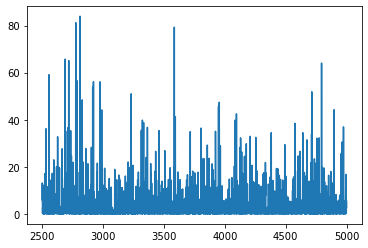

In [180]:
Eps2 = (Data2_last['Y2'] - r_hat5)**2
1/(4999)*sum(Eps2)
plt.plot(Eps2)

En comparant avec le jeu de données, retrouve-t-on le résultat attendu ?

In [181]:
Data2.describe()

Unnamed: 0            X           Y2
count  5000.000000  5000.000000  5000.000000
mean   2500.500000     3.527486     1.226723
std    1443.520003     1.839532     2.075400
min       1.000000     1.000000    -7.603334
25%    1250.750000     1.617688     0.233537
50%    2500.500000     3.576746     1.046899
75%    3750.250000     5.418334     2.250319
max    5000.000000     6.000000    10.562283

#### 3.2.2. La densité $x \mapsto \mu(x)$ peut-elle être gaussienne ? 

Proposer un protocole pour le vérifier empiriquement et l'implémenter. On pourra penser à renormaliser $\tilde{\xi}_i$ par la fonction estimée à la question précédente et s'aider des questions de la Section 3.1. 

Cette question nous a posé des difficultés. Nous proposons ici une solution mais l'issue de notre protocole était très certainement prévisible en vertue du théorême centrale limite. Nous le décrivons quand même:

Si $x \mapsto \mu(x)$ est gaussienne alors les $ \tilde{\xi}_i \sim \mathcal{N}(\mu,\sigma)$. On en déduit alors que $ \frac{\tilde{\xi}_i- \mu}{\sigma^2}  \sim \mathcal{N}(0,1)$. Nous proposons de vérifier cette dernière assertion par un test de blancheur.

lb_stat  lb_pvalue   bp_stat  bp_pvalue
1  0.021875   0.882421  0.021848   0.882491
2  2.634154   0.267917  2.629951   0.268481

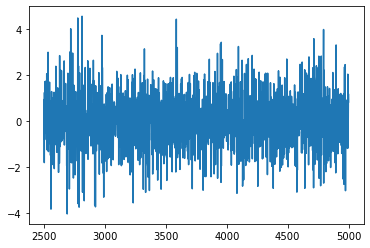

In [182]:
Eps = Data2_last['Y2'] - r_hat5
mu_hat = (1/n)*sum(Eps)
sigma_hat = (1/(n-1))*sum(Eps2)
Eps_norm = (Eps - mu_hat)/sigma_hat
plt.plot(Eps_norm)

import statsmodels.api as sm
sm.stats.diagnostic.acorr_ljungbox(x=Eps_norm, lags=[1,2], boxpierce=True, model_df=0, period=None, return_df=True,auto_lag=False)

Nous avons bien la représentation d'un bruit blanc ce que confirme le test de Box.Pierce. La densité $x -> \mapsto \mu(x)$ peut-être gaussienne.

Conclusion:

Ce devoir nous a permis de manipuler les fonctions d'estimation de densité dans le cadre non paramétrique, d'appliquer les algorithmes de validation croisée de Nadaray-Watson pour déterminer l'estimateur d'un hyperparamètre mais aussi de faire de la régression linéaire non paramétrique.
Bien souvent, l'habitude nous a conduit à nous rapprocher de notions utilisées en statistiques paramétriques tels que les tests de blancheur pour répondre aux questions.

Dans ce devoir, un des points qui m'interroge concerne la représentation graphique de l'estimateur $\tilde{\xi}_i$. En effet sa variance semblait tronquée pour les valeurs négatives. Je serai curieux de connaître l'algorithme ayant permis de construire ce jeu de données.

Outre la discipline statistique enseignée lors de ce cours, ce devoir nous a permis de nous initier à la programmation avec Python. Cette relatie inexpérience ne nous a pas permis de finaliser l'installation de rpy2.
Dommage car il aurait été intéressant de comparer les sorties fournies par les programmes R avec ceux de Python mais l'installation de rpy2 a buggé. Nous retenterons cet essai lors d'un prochain devoir.